In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('all_commodities_data.csv')

In [3]:
# Data Inspection
print(data.head(-1))

      ticker  commodity        date         open         high          low  \
0       GC=F       Gold  2000-08-30   273.899994   273.899994   273.899994   
1       GC=F       Gold  2000-08-31   274.799988   278.299988   274.799988   
2       GC=F       Gold  2000-09-01   277.000000   277.000000   277.000000   
3       GC=F       Gold  2000-09-05   275.799988   275.799988   275.799988   
4       GC=F       Gold  2000-09-06   274.200012   274.200012   274.200012   
...      ...        ...         ...          ...          ...          ...   
28470   PA=F  Palladium  2023-12-28  1133.800049  1133.800049  1133.800049   
28471   PA=F  Palladium  2023-12-29  1104.000000  1104.000000  1104.000000   
28472   PA=F  Palladium  2024-01-02  1079.099976  1079.099976  1079.099976   
28473   PA=F  Palladium  2024-01-03  1071.500000  1071.500000  1065.900024   
28474   PA=F  Palladium  2024-01-04  1033.000000  1033.000000  1033.000000   

             close  volume  
0       273.899994       0  
1    

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28476 entries, 0 to 28475
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     28476 non-null  object 
 1   commodity  28476 non-null  object 
 2   date       28476 non-null  object 
 3   open       28476 non-null  float64
 4   high       28476 non-null  float64
 5   low        28476 non-null  float64
 6   close      28476 non-null  float64
 7   volume     28476 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB
None


In [5]:
print(data.isnull().sum())

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64


In [6]:
# Drop rows with missing values
data = data.dropna()

In [7]:
# Convert the 'date' column to datetime type
data['date'] = pd.to_datetime(data['date'])

In [8]:
# Sort the DataFrame based on the 'date' column
data.sort_index(inplace=True)

In [9]:
# Check for and handle duplicate rows
data = data[~data.index.duplicated(keep='first')]

In [10]:
print(data.describe())

               open          high           low         close         volume
count  28476.000000  28476.000000  28476.000000  28476.000000   28476.000000
mean     598.088363    600.302557    595.720564    598.073558    1543.268647
std      643.268820    645.280582    640.917428    643.011593   12058.948575
min        0.609000      0.609500      0.604000      0.604000       0.000000
25%        7.607750      7.635000      7.597000      7.612750       3.000000
50%      407.349991    407.975006    406.150009    407.225006      65.000000
75%     1030.000000   1032.199951   1027.112488   1029.549988     365.000000
max     3380.500000   3380.500000   2985.399902   2985.399902  386334.000000


In [11]:
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(data[['open', 'high', 'low', 'close', 'volume']])

# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Print and handle outliers
print("Number of outliers:", outliers.sum())
print("Outliers:", data[outliers])
# Handle outliers as needed (e.g., removing or replacing them)
data = data[~outliers]

Number of outliers: 413
Outliers:       ticker  commodity       date         open         high          low  \
557     GC=F       Gold 2002-11-25   316.500000   317.799988   316.500000   
680     GC=F       Gold 2003-05-27   367.799988   367.799988   367.799988   
681     GC=F       Gold 2003-05-28   367.000000   367.299988   358.600006   
724     GC=F       Gold 2003-07-29   364.700012   364.799988   364.799988   
807     GC=F       Gold 2003-11-24   391.500000   391.500000   391.500000   
...      ...        ...        ...          ...          ...          ...   
28019   PA=F  Palladium 2022-03-14  2628.000000  2628.000000  2412.199951   
28022   PA=F  Palladium 2022-03-17  2530.000000  2530.000000  2488.100098   
28023   PA=F  Palladium 2022-03-18  2536.000000  2536.000000  2489.100098   
28024   PA=F  Palladium 2022-03-21  2533.399902  2533.399902  2533.399902   
28027   PA=F  Palladium 2022-03-24  2526.699951  2526.699951  2526.699951   

             close  volume  
557     317.

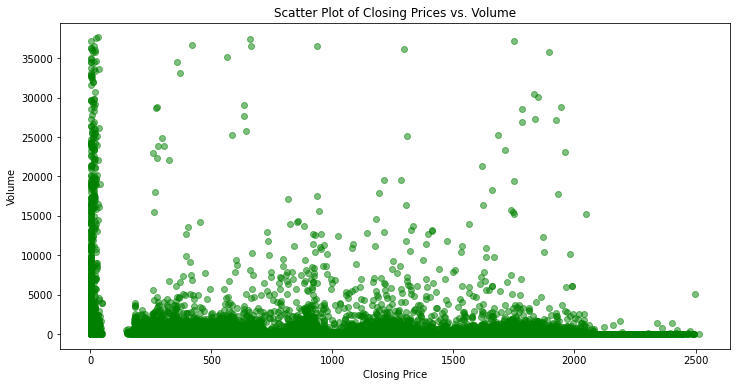

In [12]:
import matplotlib.pyplot as plt
df = data
# Set the figure size
plt.figure(figsize=(12, 6))

# Scatter plot of closing prices vs. volume
plt.scatter(df['close'], df['volume'], color='green', alpha=0.5)

# Adding labels and title
plt.title('Scatter Plot of Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')

# Display the plot
plt.show()

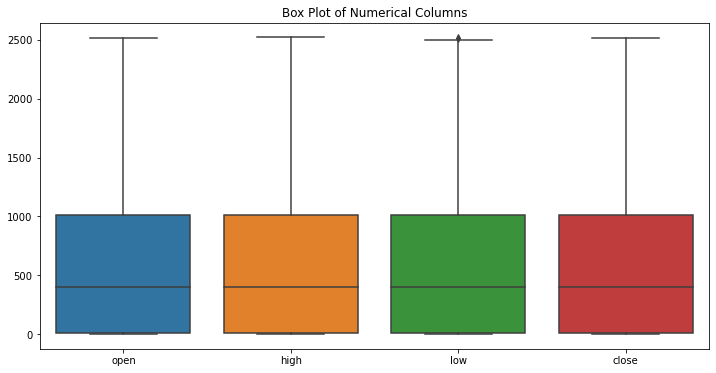

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['open', 'high', 'low', 'close']])
plt.title('Box Plot of Numerical Columns')
plt.show()

Create scatter plots to visualize relationships between variables and identify potential outliers.

since the 'commodity' has 5 different categories and each categories has different prices and so on,
So having an outliner in this is close to min to none

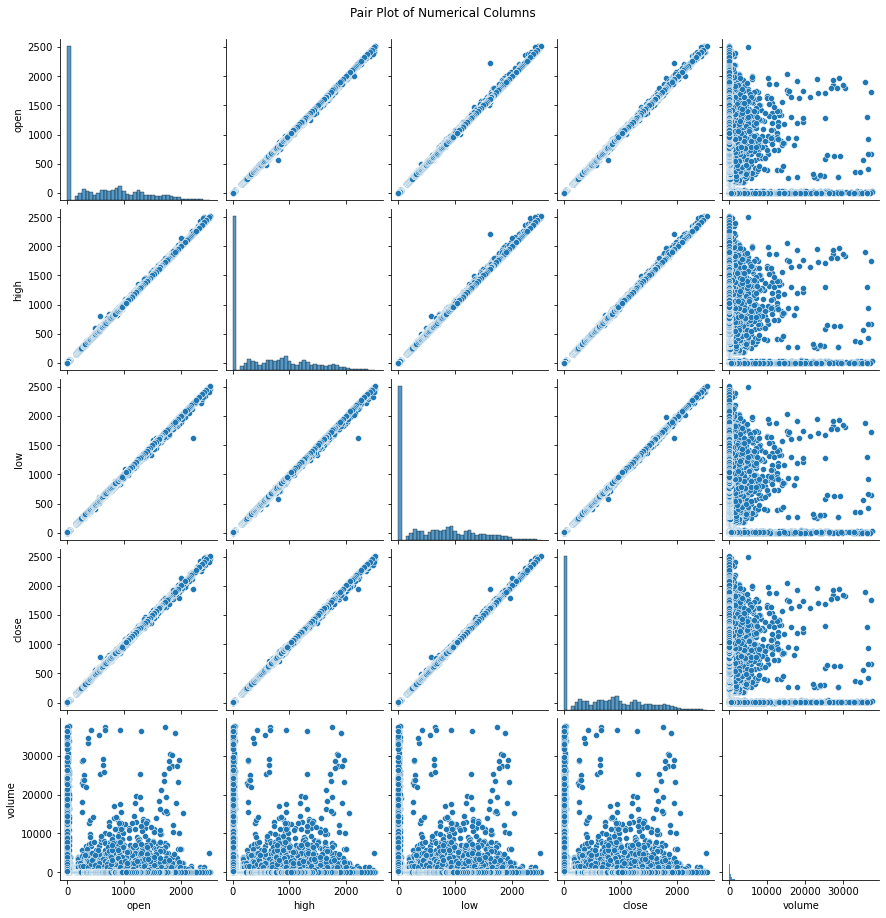

In [14]:
# Create scatter plots for numerical columns
sns.pairplot(data[['open', 'high', 'low', 'close', 'volume']])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Specify columns to be scaled
columns_to_scale = ['open', 'high', 'low', 'close', 'volume']

# Apply Min-Max scaling to specified columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


 'daily_return' represents the percentage change in the closing price from the previous day

In [16]:
# Creating a new feature 'daily_return'
data['daily_return'] = data['close'].pct_change()

# Drop the first row since percentage change is not defined for the first day
data = data.dropna()

Label encoding assigns a unique integer to each category

In [17]:
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder for 'ticker'
label_encoder = LabelEncoder()
data['ticker'] = label_encoder.fit_transform(data['ticker'])


/var/folders/c3/31lxf9qn7j9d6_tt0kxwvg3h0000gn/T/ipykernel_1661/1860270523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ticker'] = label_encoder.fit_transform(data['ticker'])


In [18]:
# Find unique values in the 'ticker' column
unique_tickers = data['ticker'].unique()

# Print the unique values
print("Unique Tickers:", unique_tickers)

Unique Tickers: [0 4 3 1 2]


In [19]:
# Find unique values in the 'commodity' column
unique_commodity = data['commodity'].unique()

# Print the unique values
print("commodity:", unique_commodity)

commodity: ['Gold' 'Silver' 'Platinum' 'Copper' 'Palladium']


In [20]:
# Set the style for seaborn
sns.set(style="whitegrid")

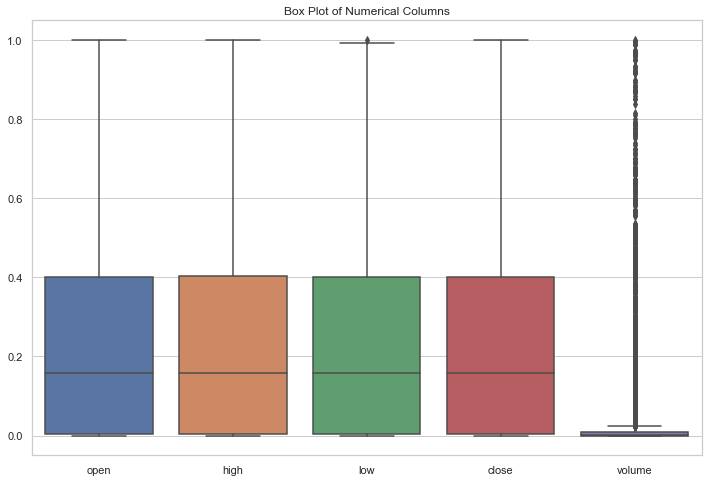

In [21]:
# Box Plots for Numerical Columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['open', 'high', 'low', 'close', 'volume']])
plt.title('Box Plot of Numerical Columns')
plt.show()

<Figure size 864x576 with 0 Axes>

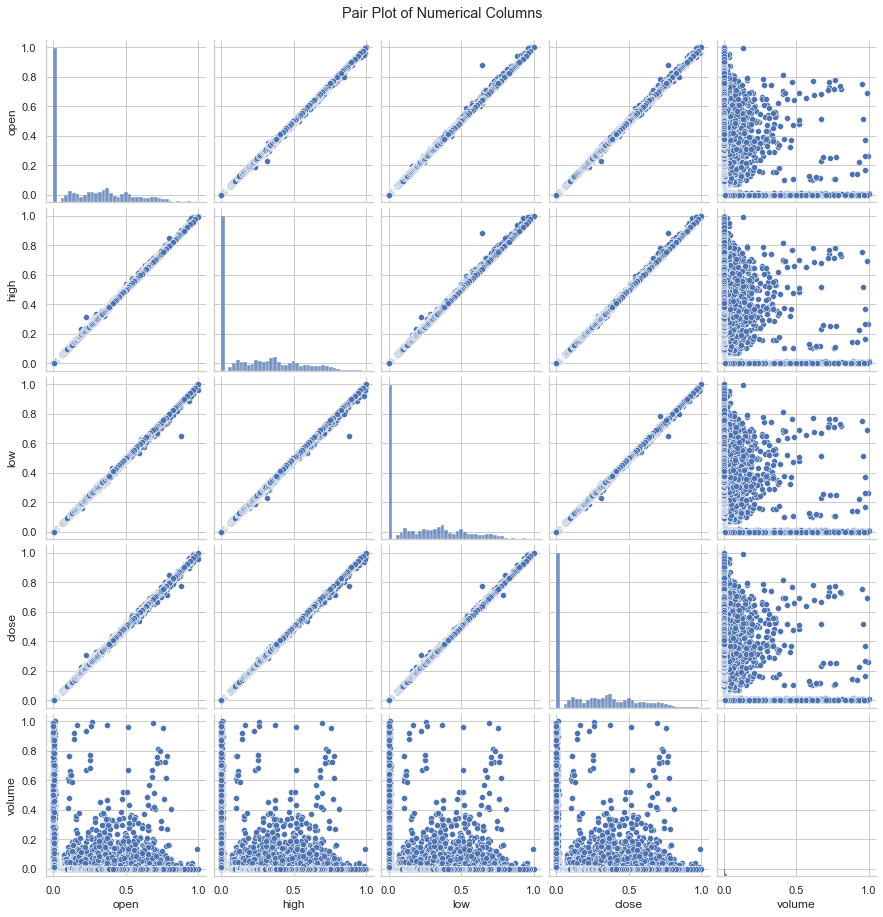

In [22]:
# Pair Plot for Numerical Columns
plt.figure(figsize=(12, 8))
sns.pairplot(data[['open', 'high', 'low', 'close', 'volume']])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

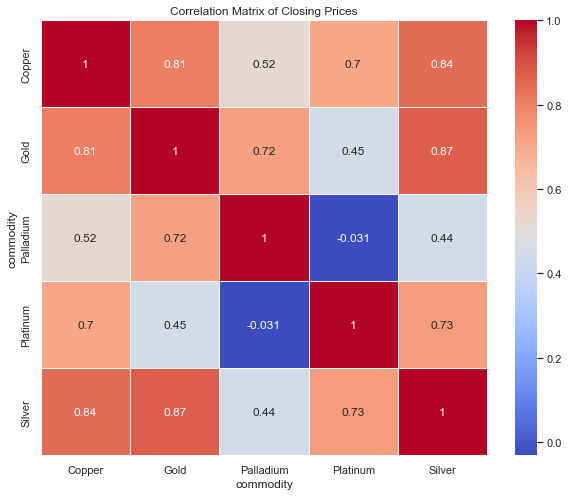

In [23]:
# Create a pivot table for closing prices by commodity
closing_prices_pivot = df.pivot_table(values='close', index='date', columns='commodity')

# Calculate correlations
correlation_matrix = closing_prices_pivot.corr()

# Plot a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Closing Prices')
plt.show()

The correlation matrix shows that all of the metals have positive correlations with each other. The strongest correlations are between gold and silver (0.87), gold and platinum (0.84), and gold and palladium (0.81). This means that the prices of these metals tend to move in the same direction. The weakest correlation is between copper and platinum (0.44).

- **Copper and gold:** Copper and gold are often seen as safe-haven assets, meaning that investors tend to buy them when they are feeling nervous about the economy. This is why the correlation between copper and gold is relatively high (0.81).
- **Copper and silver:** Copper and silver are both industrial metals, meaning that they are used in a wide variety of manufacturing processes. The demand for copper and silver is therefore linked to the global economy. This is why the correlation between copper and silver is relatively high (0.84).
- **Copper and platinum:** Copper and platinum are both used in the automotive industry. However, platinum is also used in jewelry and other luxury goods. This means that the demand for platinum is not as tightly linked to the global economy as the demand for copper. This is why the correlation between copper and platinum is lower than the correlations between copper and the other metals (0.44).
- **Gold and silver:** Gold and silver are both precious metals that have been used as a store of value for centuries. They are also both industrial metals. This is why the correlation between gold and silver is very high (0.87).
- **Gold and platinum:** Gold and platinum are both precious metals that are used in jewelry and other luxury goods. They are also both industrial metals. This is why the correlation between gold and platinum is very high (0.84).
- **Gold and palladium:** Gold and palladium are both precious metals that are used in the automotive industry. Palladium is also used in catalytic converters, which are devices that reduce emissions from vehicles. This is why the correlation between gold and palladium is very high (0.81).
- **Palladium and platinum:** Palladium and platinum are both precious metals that are used in the automotive industry. They are also both used in jewelry and other luxury goods. This is why the correlation between palladium and platinum is very high (0.73).
- **Palladium and silver:** Palladium and silver are both industrial metals. However, palladium is also used in jewelry and other luxury goods. This means that the demand for palladium is not as tightly linked to the global economy as the demand for silver. This is why the correlation between palladium and silver is lower than the correlations between palladium and the other metals (0.44).
- **Platinum and silver:** Platinum and silver are both precious metals that are used in jewelry and other luxury goods. They are also both industrial metals. This is why the correlation between platinum and silver is very high (0.73).

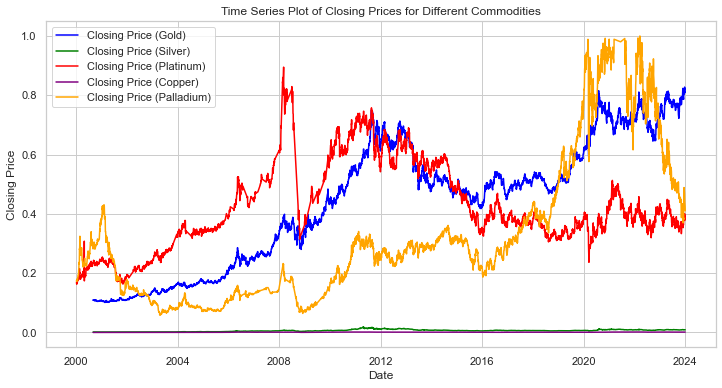

In [24]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the time series data for each commodity
commodities = df['commodity'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange']

for commodity, color in zip(commodities, colors):
    subset = df[df['commodity'] == commodity]
    plt.plot(subset['date'], subset['close'], label=f'Closing Price ({commodity})', color=color)

# Adding labels and title
plt.title('Time Series Plot of Closing Prices for Different Commodities')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

It is a time series plot of closing prices for different commodities in the United States over the past 10 years. The average changing price for a commodity in the United States has been increasing over the past 10 years.

The following are some of the reasons for the increasing prices of commodities:

- **Increased demand:** The global population is growing, and people are consuming more commodities. This has led to increased demand for commodities, which has pushed up prices.
- **Economic growth:** Economic growth in emerging markets has also led to increased demand for commodities. Emerging markets are growing rapidly, and their economies are becoming more industrialized. This has led to increased demand for commodities such as oil and metals.
- **Speculation:** Speculators often buy commodities in the hope of selling them at a higher price in the future. This can create bubbles in commodity markets, which can push up prices.



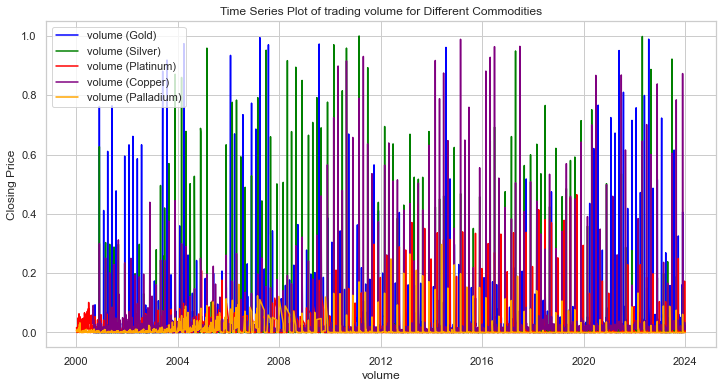

In [25]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the time series data for each commodity
commodities = df['commodity'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange']

for commodity, color in zip(commodities, colors):
    subset = df[df['commodity'] == commodity]
    plt.plot(subset['date'], subset['volume'], label=f'volume ({commodity})', color=color)

# Adding labels and title
plt.title('Time Series Plot of trading volume for Different Commodities')
plt.xlabel('volume')
plt.ylabel('Closing Price')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [26]:
# Descriptive statistics for closing prices and trading volumes
closing_prices_stats = df.groupby('ticker')['close'].describe()
volume_stats = df.groupby('ticker')['volume'].describe()

print("Closing Prices Statistics:")
print(closing_prices_stats)

print("\nTrading Volume Statistics:")
print(volume_stats)


Closing Prices Statistics:
         count      mean       std       min       25%       50%       75%  \
ticker                                                                       
GC=F    5684.0  0.439695  0.212187  0.101199  0.237910  0.485008  0.610784   
HG=F    5823.0  0.000832  0.000438  0.000000  0.000575  0.000922  0.001155   
PA=F    5442.0  0.323755  0.232871  0.058810  0.139846  0.276114  0.386849   
PL=F    5327.0  0.421269  0.145026  0.163590  0.337083  0.384403  0.533143   
SI=F    5787.0  0.006321  0.003304  0.001361  0.003947  0.006312  0.008356   

             max  
ticker            
GC=F    0.827620  
HG=F    0.001720  
PA=F    1.000000  
PL=F    0.894902  
SI=F    0.019079  

Trading Volume Statistics:
         count      mean       std  min       25%       50%       75%  \
ticker                                                                  
GC=F    5684.0  0.016763  0.069991  0.0  0.000505  0.002617  0.009139   
HG=F    5823.0  0.024431  0.073930  0.0  0.006

In [27]:
# Calculate daily returns
df['daily_return'] = df.groupby('ticker')['close'].pct_change()

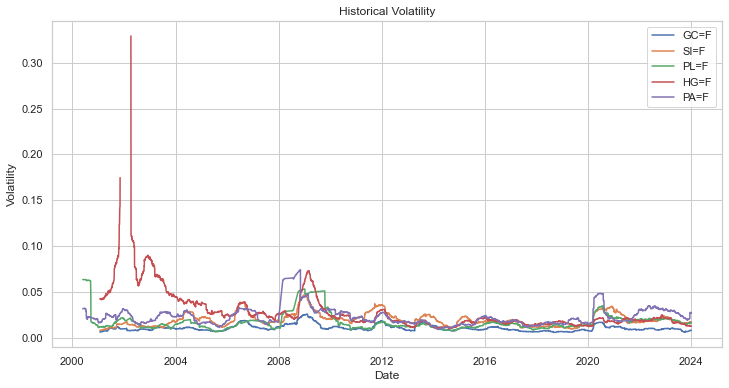

In [28]:
# Calculate rolling standard deviation (volatility)
rolling_volatility = df.groupby('ticker')['daily_return'].rolling(window=100).std()

# Plot historical volatility
plt.figure(figsize=(12, 6))
for ticker in df['ticker'].unique():
    plt.plot(df[df['ticker'] == ticker]['date'], rolling_volatility[ticker], label=ticker)

plt.title('Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

It is a time series plot of Volatility over the span of 24 years in which you can note that the price influcation goes on becasue of the great ression in 2008 and the decline due to global pandemic in 2020, then you can see the sharp rise in the last 4 years due to demand. 